In [2]:
import cv2
import glob
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
import scipy.ndimage

In [23]:
def convert_frame_to_polar(frame):
    center_y, center_x = np.array(frame.shape[:2]) / 2
    im = cv2.linearPolar(
        frame,
        (center_x, center_y),
        center_x - 40,
        cv2.WARP_FILL_OUTLIERS,
    )
    
    # Copy 120 of the top rows to the bottom
    
    return np.concatenate((im, im[:120]), axis=0)
    


def convertImageToInput(im, theta=0):
    x,y = im.shape[1]/2,im.shape[0]/2
    im = cv2.linearPolar(im, (x,y), y, cv2.WARP_FILL_OUTLIERS)
    return im
    im = cv2.resize(im, (256,160))

    im2 = np.zeros((256,256,3), dtype="uint8")
    im2[:160] = im
    im2[160:] = im[:256-160]
    return im2

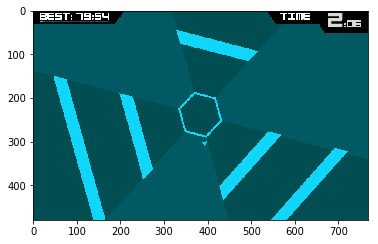

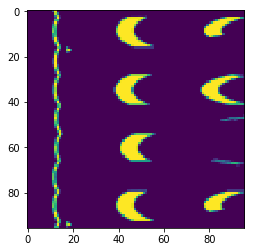

In [27]:
for path in glob.glob('./screenshots/screenshot_*.png'):
    frame = imageio.imread(path)
    
    plt.figure()
    plt.imshow(frame)
   
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    frame = convert_frame_to_polar(frame)
    frame = ((frame[..., 2] > 128) * 255).astype(np.uint8)
    frame = cv2.resize(frame, (96, 96), interpolation=cv2.INTER_AREA)

    plt.figure()
    plt.imshow(frame)